<a href="https://colab.research.google.com/github/benvictoria21/MachineLearning/blob/master/Feature_Encoding_Using_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install --upgrade pip

In [23]:
!sudo pip install seaborn

In [24]:
# Data wrangling
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [25]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
print("Data shape: ", data.shape)

Data shape:  (1000, 8)


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [28]:
data.dtypes.value_counts()

object    5
int64     3
dtype: int64

In [29]:
score = data[['math score', 'reading score', 'writing score']]
score.head()


,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


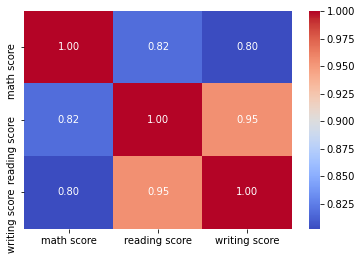

In [30]:
# Correlation between test scores

correlation = score.corr()
sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = 'coolwarm')

In [31]:
# Calculate average of all test results
data['mean score'] = data.mean(axis = 1)

# Drop math score, reading score and writing score
data = data.drop(['math score', 'reading score', 'writing score'], axis = 1)

# Show first 5 rows of new dataframe
data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


In [32]:
# Mean score data type

print("Mean score data type: ", data['mean score'].dtype)

Mean score data type:  float64


In [33]:
# Mean score data type

print("Mean score data type: ", data['mean score'].dtype)

Mean score data type:  float64


In [34]:
# Mean score by gender 

data[['gender', 'mean score']].groupby('gender', as_index = False).mean().sort_values(by = 'mean score', ascending = False, ignore_index = True)


,gender,mean score
0,female,69.569498
1,male,65.837483


Text(0.5, 1.0, 'Mean Score by Gender')

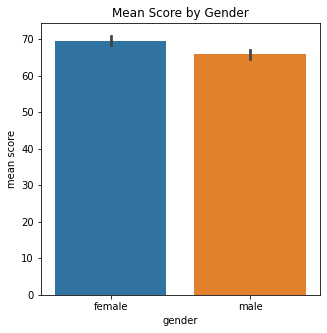

In [35]:
# Mean score by gender barplot

plt.figure(figsize = (5, 5))
sns.barplot(x = 'gender', y = 'mean score', data = data)
plt.title('Mean Score by Gender')

In [36]:
# Mean score by race/ethnicity

data[['race/ethnicity', 'mean score']].groupby('race/ethnicity', as_index = False).mean().sort_values(by = 'mean score', ascending = False, ignore_index = True)


,race/ethnicity,mean score
0,group E,72.752381
1,group D,69.179389
2,group C,67.131661
3,group B,65.468421
4,group A,62.992509


Text(0.5, 1.0, 'Mean Score by Race/Ethnicity')

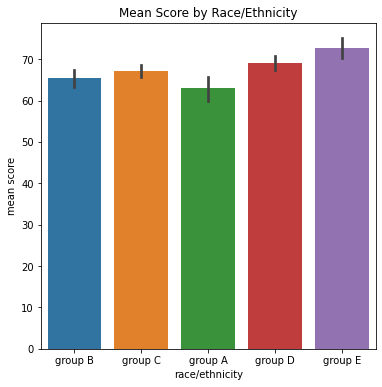

In [37]:
# Mean score by race/ethnicity barplot

plt.figure(figsize = (6, 6))
sns.barplot(x = 'race/ethnicity', y = 'mean score', data = data)
plt.title('Mean Score by Race/Ethnicity')

Text(0.5, 1.0, 'Mean Score by Race/Ethnicity')

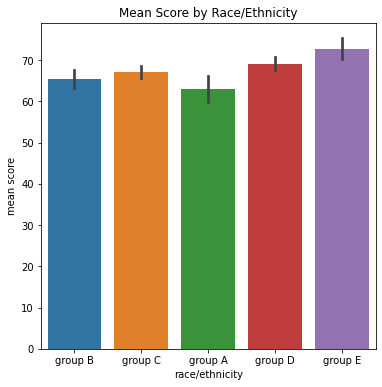

In [38]:
# Mean score by race/ethnicity barplot

plt.figure(figsize = (6, 6))
sns.barplot(x = 'race/ethnicity', y = 'mean score', data = data)
plt.title('Mean Score by Race/Ethnicity')

In [39]:
# Mean score by parental level of education 

data[['parental level of education', 'mean score']].groupby('parental level of education', as_index = False).mean().sort_values(by = 'mean score', ascending = False, ignore_index = True)

,parental level of education,mean score
0,master's degree,73.598870
1,bachelor's degree,71.923729
2,associate's degree,69.569069
3,some college,68.476401
4,some high school,65.108007
5,high school,63.096939


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

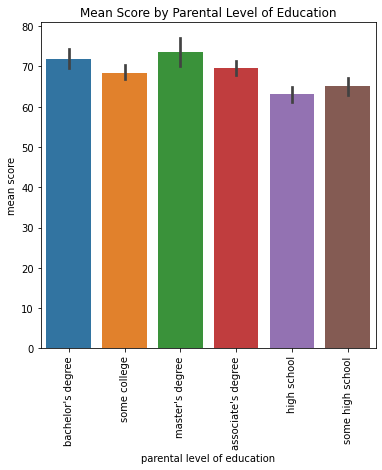

In [40]:
# Mean score by parental level of education barplot

plt.figure(figsize = (6, 6))
sns.barplot(x = 'parental level of education', y = 'mean score', data = data)
plt.title('Mean Score by Parental Level of Education')
plt.xticks(rotation = 90)

In [41]:

data[['lunch', 'mean score']].groupby('lunch', as_index = False).mean().sort_values(by = 'mean score', ascending = False, ignore_index = True)

,lunch,mean score
0,standard,70.837209
1,free/reduced,62.199061


Text(0.5, 1.0, 'Mean Score by Lunch')

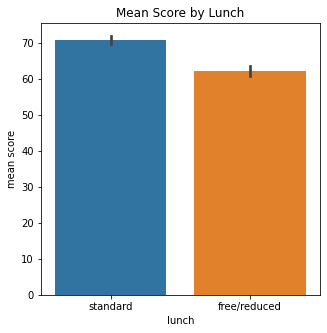

In [42]:

plt.figure(figsize = (5, 5))
sns.barplot(x = 'lunch', y = 'mean score', data = data)
plt.title('Mean Score by Lunch')


In [43]:
data[['test preparation course', 'mean score']].groupby('test preparation course', as_index = False).mean().sort_values(by = 'mean score', ascending = False, ignore_index = True)

,test preparation course,mean score
0,completed,72.669460
1,none,65.038941


Text(0.5, 1.0, 'Mean Score by Test Preparation Course')

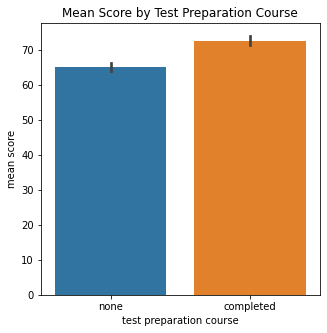

In [44]:

plt.figure(figsize = (5, 5))
sns.barplot(x = 'test preparation course', y = 'mean score', data = data)
plt.title('Mean Score by Test Preparation Course')

In [45]:
data['mean score'].describe()

count    1000.000000
mean       67.770667
std        14.257326
min         9.000000
25%        58.333333
50%        68.333333
75%        77.666667
max       100.000000
Name: mean score, dtype: float64

Text(0.5, 1.0, 'Distribution of Mean Score')

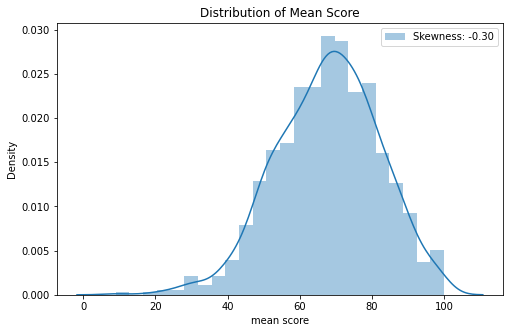

In [46]:
plt.figure(figsize = (8, 5))
sns.distplot(data['mean score'], label = 'Skewness: {:.2f}'.format(data['mean score'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of Mean Score')

In [47]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


In [48]:
ohe = OneHotEncoder(sparse = False)

In [49]:
ohe.fit_transform(data[["gender"]])[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [50]:
data["gender"].head()

0    female
1    female
2    female
3      male
4      male
Name: gender, dtype: object

In [51]:
ohe.categories_

[array(['female', 'male'], dtype=object)]

In [52]:
pd.get_dummies(data["gender"]).head()

,female,male
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


In [53]:
list(data["parental level of education"].unique())

["bachelor's degree",
 'some college',
 "master's degree",
 "associate's degree",
 'high school',
 'some high school']

In [58]:
education_categories = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]

In [60]:
oe = OrdinalEncoder(categories = [education_categories])

In [61]:

oe.fit_transform(data[['parental level of education']])[:5]

array([[4.],
       [2.],
       [5.],
       [3.],
       [2.]])

In [63]:
data['parental level of education'].map({'some high school': 0, 
                                         'high school': 1,
                                         'some college': 2,
                                         "associate's degree": 3, 
                                         "bachelor's degree": 4,
                                         "master's degree": 5}).head()

0    4
1    2
2    5
3    3
4    2
Name: parental level of education, dtype: int64

In [64]:

X = data.drop('mean score', axis = 1)
Y = data['mean score']

In [65]:
column_transform = make_column_transformer(
    (ohe, ['gender', 'race/ethnicity', 'lunch', 'test preparation course']), 
    (oe, ['parental level of education']))

In [66]:
column_transform.fit_transform(X)[:5]

array([[1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 4.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 2.],
       [1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 5.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 3.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 2.]])

In [67]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (700, 5)
Y_train shape:  (700,)
X_test shape:  (300, 5)
Y_test shape:  (300,)


In [69]:
lm = LinearRegression()
lm_pipeline = make_pipeline(column_transform, lm)

In [70]:
gbm = GradientBoostingRegressor()
gbm_pipeline = make_pipeline(column_transform, gbm)

In [71]:
lm_pipeline.fit(X_train, Y_train)
lm_predictions = lm_pipeline.predict(X_test)
print("First 5 LM predictions: ", list(lm_predictions[:5]))

gbm_pipeline.fit(X_train, Y_train)
gbm_predictions = gbm_pipeline.predict(X_test)
print("First 5 GBM predictions: ", list(gbm_predictions[:5]))

First 5 LM predictions:  [70.75, 66.25, 71.0625, 56.625, 78.0]
First 5 GBM predictions:  [70.03246540754012, 72.82747187650256, 68.63467096651152, 58.88811703198365, 76.97875270900471]


In [73]:
print("Number of LM predictions: ", len(lm_predictions))
print("Number of GBM predictions: ", len(gbm_predictions))
print("Size of test set: ", len(Y_test))

Number of LM predictions:  300
Number of GBM predictions:  300
Size of test set:  300


In [74]:
lm_mae = mean_absolute_error(lm_predictions, Y_test)
lm_rmse =  np.sqrt(mean_squared_error(lm_predictions, Y_test))
print("LM MAE: {:.2f}".format(round(lm_mae, 2)))
print("LM RMSE: {:.2f}".format(round(lm_rmse, 2)))

gbm_mae = mean_absolute_error(gbm_predictions, Y_test)
gbm_rmse =  np.sqrt(mean_squared_error(gbm_predictions, Y_test))
print("GBM MAE: {:.2f}".format(round(gbm_mae, 2)))
print("GBM RMSE: {:.2f}".format(round(gbm_rmse, 2)))

LM MAE: 10.48
LM RMSE: 13.13
GBM MAE: 10.95
GBM RMSE: 13.78
